In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import geopandas

In [2]:
df = pd.read_csv('occurrences.csv', encoding='latin1')
df

,id,institutionCode,collectionCode,ownerInstitutionCode,basisOfRecord,occurrenceID,catalogNumber,otherCatalogNumbers,higherClassification,kingdom,...,verbatimDepth,verbatimElevation,disposition,language,recordEnteredBy,modified,sourcePrimaryKey-dbpk,collID,recordID,references
0,3077805,FNL,NaN,NaN,PreservedSpecimen,NaN,FI1-001,NaN,Fungi|Basidiomycota|Agaricomycotina|Agaricomyc...,Fungi,...,NaN,NaN,NaN,NaN,NaN,2016-08-24 00:00:00,NaN,62,3032814b-5234-4260-84b1-5d2885ec76aa,https://www.mycoportal.org/portal/collections/...
1,3077806,FNL,NaN,NaN,PreservedSpecimen,NaN,FI1-002,NaN,Fungi|Basidiomycota|Agaricomycotina|Agaricomyc...,Fungi,...,NaN,NaN,NaN,NaN,NaN,2016-08-24 00:00:00,NaN,62,b5fdc281-dd01-483d-8db9-579e9b249636,https://www.mycoportal.org/portal/collections/...
2,3077807,FNL,NaN,NaN,PreservedSpecimen,NaN,FI1-003,NaN,Fungi|Basidiomycota|Agaricomycotina|Agaricomyc...,Fungi,...,NaN,NaN,NaN,NaN,NaN,2016-08-24 00:00:00,NaN,62,e2ffbc21-886a-4f06-997f-f599dfcb28b1,https://www.mycoportal.org/portal/collections/...
3,3077808,FNL,NaN,NaN,PreservedSpecimen,NaN,FI1-004,NaN,Fungi|Basidiomycota|Ustilaginomycotina|Exobasi...,Fungi,...,NaN,NaN,NaN,NaN,NaN,2016-08-24 00:00:00,NaN,62,8f66f9c3-2442-45c4-8a03-8590a8030a41,https://www.mycoportal.org/portal/collections/...
4,3077809,FNL,NaN,NaN,PreservedSpecimen,NaN,FI1-005,NaN,Fungi|Basidiomycota|Agaricomycotina|Agaricomyc...,Fungi,...,NaN,NaN,NaN,NaN,titurri,2016-08-23 00:00:00,NaN,62,74a16b7f-ff46-42d3-a788-d3ad6ac852e2,https://www.mycoportal.org/portal/collections/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6157,3964494,FNL,NaN,NaN,PreservedSpecimen,NaN,MS9-166,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2016-12-07 11:30:59,MS9-166,62,79c86354-3781-457c-b836-fab1141fdedb,https://www.mycoportal.org/portal/collections/...
6158,3964495,FNL,NaN,NaN,PreservedSpecimen,NaN,MS9-167,NaN,Fungi|Basidiomycota|Agaricomycotina|Agaricomyc...,Fungi,...,NaN,NaN,NaN,NaN,NaN,2017-12-04 10:57:33,MS9-167,62,4f62265f-cd09-4337-826d-69af9731dcda,https://www.mycoportal.org/portal/collections/...
6159,3964496,FNL,NaN,NaN,PreservedSpecimen,NaN,MS9-169,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2016-12-07 11:30:59,MS9-169,62,1bf97079-9363-4dca-bf20-601d27e74274,https://www.mycoportal.org/portal/collections/...
6160,3964497,FNL,NaN,NaN,PreservedSpecimen,NaN,MS9-170,NaN,Fungi|Basidiomycota|Agaricomycotina|Agaricomyc...,Fungi,...,NaN,NaN,NaN,NaN,NaN,2016-12-07 11:31:05,MS9-170,62,ef7bd024-e0f1-45d1-a524-4a8246b266f9,https://www.mycoportal.org/portal/collections/...


In [3]:
df['habitat'].nunique()

305

In [4]:
df_subset = df[['phylum', 'class', 'order', 'family','genus', 'taxonRank', 'year','month','decimalLongitude','decimalLatitude', 'habitat']]
df_subset = df_subset.dropna(subset=['habitat']).reset_index(drop=True)
df_subset['habitat'] = df_subset['habitat'].str.lower()
df_subset

,phylum,class,order,family,genus,taxonRank,year,month,decimalLongitude,decimalLatitude,habitat
0,Basidiomycota,Agaricomycetes,Agaricales,Inocybaceae,Inocybe,Species,2013.0,9.0,-54.416667,49.583333,coniferous woods
1,Basidiomycota,Agaricomycetes,Agaricales,Strophariaceae,Hebeloma,Genus,2013.0,9.0,-54.252747,49.708187,mixed forest
2,Basidiomycota,Agaricomycetes,Boletales,Gomphidiaceae,Gomphidius,Species,2013.0,9.0,-54.416667,49.583333,mixed forest
3,Basidiomycota,Exobasidiomycetes,Exobasidiales,Exobasidiaceae,Exobasidium,Species,2013.0,9.0,-54.416667,49.583333,bog
4,Basidiomycota,Agaricomycetes,Agaricales,Cortinariaceae,Cortinarius,Species,2013.0,9.0,-54.166667,49.666667,mixed forest
...,...,...,...,...,...,...,...,...,...,...,...
5444,NaN,NaN,NaN,NaN,NaN,NaN,2009.0,9.0,-55.540332,48.970635,mixed woods
5445,Basidiomycota,Agaricomycetes,Agaricales,Cortinariaceae,Cortinarius,Morph,2009.0,9.0,-55.540332,48.970635,mixed woods
5446,NaN,NaN,NaN,NaN,NaN,NaN,2009.0,9.0,-55.081552,49.114012,mixed woods
5447,Basidiomycota,Agaricomycetes,Agaricales,Cortinariaceae,Cortinarius,Species,2009.0,9.0,-55.540332,48.970635,"coniferous woods, mixed woods"


In [5]:
df_subset['year'] = df_subset['year'].astype('category')
df_subset['month'] = df_subset['month'].astype('category')
df_subset

,phylum,class,order,family,genus,taxonRank,year,month,decimalLongitude,decimalLatitude,habitat
0,Basidiomycota,Agaricomycetes,Agaricales,Inocybaceae,Inocybe,Species,2013.0,9.0,-54.416667,49.583333,coniferous woods
1,Basidiomycota,Agaricomycetes,Agaricales,Strophariaceae,Hebeloma,Genus,2013.0,9.0,-54.252747,49.708187,mixed forest
2,Basidiomycota,Agaricomycetes,Boletales,Gomphidiaceae,Gomphidius,Species,2013.0,9.0,-54.416667,49.583333,mixed forest
3,Basidiomycota,Exobasidiomycetes,Exobasidiales,Exobasidiaceae,Exobasidium,Species,2013.0,9.0,-54.416667,49.583333,bog
4,Basidiomycota,Agaricomycetes,Agaricales,Cortinariaceae,Cortinarius,Species,2013.0,9.0,-54.166667,49.666667,mixed forest
...,...,...,...,...,...,...,...,...,...,...,...
5444,NaN,NaN,NaN,NaN,NaN,NaN,2009.0,9.0,-55.540332,48.970635,mixed woods
5445,Basidiomycota,Agaricomycetes,Agaricales,Cortinariaceae,Cortinarius,Morph,2009.0,9.0,-55.540332,48.970635,mixed woods
5446,NaN,NaN,NaN,NaN,NaN,NaN,2009.0,9.0,-55.081552,49.114012,mixed woods
5447,Basidiomycota,Agaricomycetes,Agaricales,Cortinariaceae,Cortinarius,Species,2009.0,9.0,-55.540332,48.970635,"coniferous woods, mixed woods"


In [6]:
cdf = geopandas.read_file('canada.shp')
cdf = cdf.head(1)
cdf

,GEO,Population,geometry
0,Newfoundland and Labrador,520553,"MULTIPOLYGON (((8307365.589 2582136.711, 83083..."


In [7]:
cdf.crs

<Projected CRS: PROJCS["PCS_Lambert_Conformal_Conic",GEOGCS["NAD83 ...>
Name: PCS_Lambert_Conformal_Conic
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [8]:
cdf = cdf.to_crs("EPSG:4326")

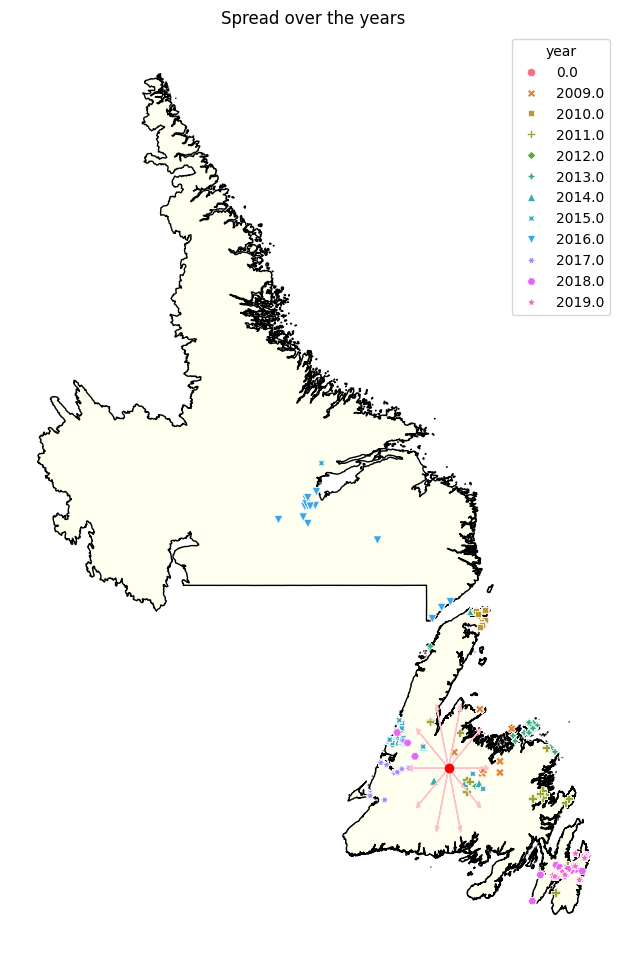

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax1 = plt.subplots(figsize=(20, 12))

for ax in [ax1]:
    cdf.plot(ax=ax, color='#FFFFF0', ec='k')
    ax.axis('off')

sns.scatterplot(data=df_subset, x='decimalLongitude', y='decimalLatitude', hue='year', style='year', ax=ax1)
# sns.scatterplot(data=df_subset, x='decimalLongitude', y='decimalLatitude', hue='month', style='month', ax=ax2)


ax1.set_title('Spread over the years')
# ax2.set_title('Spread during months')
# ax3.set_title('Phylum Spread')
# fig.suptitle('Spread Analysis through time')


center = (-56.5, 49)

# Define the radius of the circle
radius = 1

# Define the number of arrows
num_arrows = 10

# Calculate the angle between each arrow
angle_step = 2 * np.pi / num_arrows
ax1.plot(*center, 'ro')
for i in range(num_arrows):
    angle = i * angle_step
    x_end = center[0] + radius * np.cos(angle)
    y_end = center[1] + radius * np.sin(angle)
    dx = x_end - center[0]
    dy = y_end - center[1]
    ax1.arrow(*center, dx, dy, head_width=0.1, head_length=0.1, fc='pink', ec='pink')

plt.show()


## Question: Does change of habitat (probably due to climate change) is influencing the spread of the mushroom over the years?

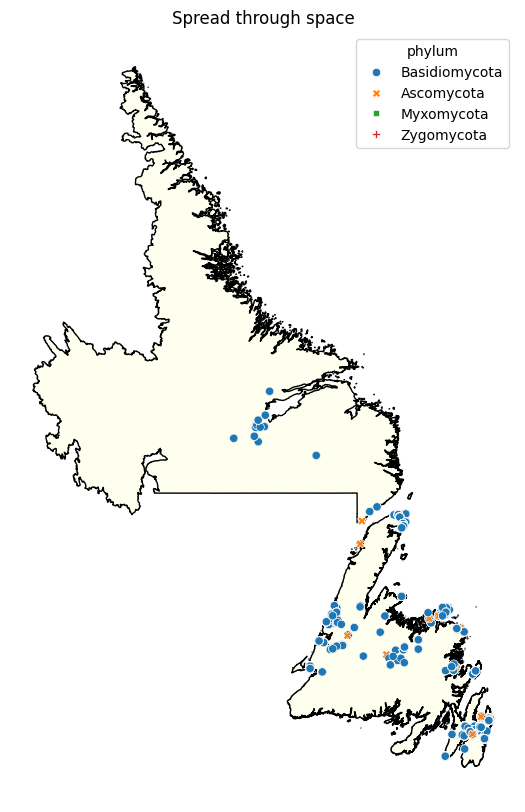

In [10]:
fig, ax = plt.subplots(figsize=(20,10))
cdf.plot(ax=ax, color='#FFFFF0', ec='k')
sns.scatterplot(data=df_subset, x='decimalLongitude', y='decimalLatitude', hue='phylum', style='phylum', ax=ax)
ax.axis('off')
ax.set_title('Spread through space')
plt.show()

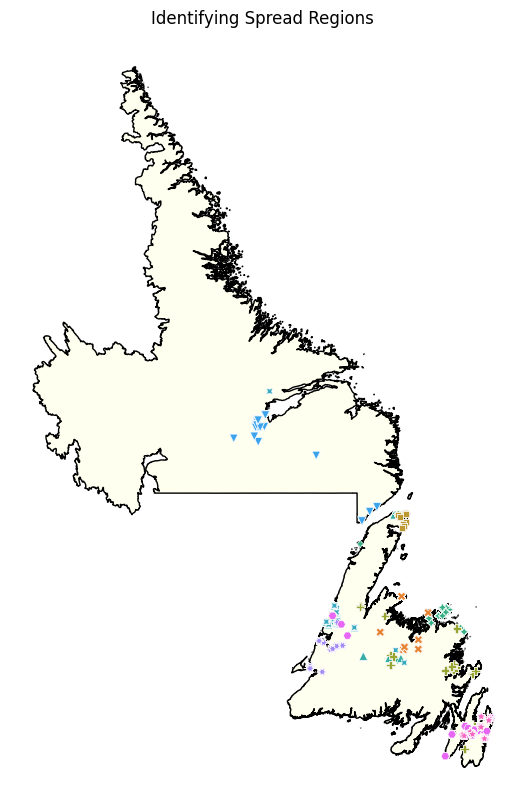

In [11]:
fig, ax = plt.subplots(figsize=(20,10))
cdf.plot(ax=ax, color='#FFFFF0', ec='k')
sns.scatterplot(data=df_subset, x='decimalLongitude', y='decimalLatitude', hue='year', style='year', ax=ax, legend=False)
ax.axis('off')
ax.set_title('Identifying Spread Regions')
plt.show()

Through ML, we are trying to predict that with years in the future, where we can see more spread

In [12]:
central_n = [2009.0, 2013.0, 2014.0]
central_east_n = [2011.0]
north_east_n = [2012.0]
labrador = [2016.0]
west_n = [2015.0, 2017.0]
avalon_peninsula = [2018.0, 2019.0]

In [13]:
conditions = {
    'Central Newfoundland': df_subset['year'].isin(central_n),
    'Central East Newfoundland': df_subset['year'].isin(central_east_n),
    'North East Newfoundland': df_subset['year'].isin(north_east_n),
    'Labrador': df_subset['year'].isin(labrador),
    'West Newfoundland': df_subset['year'].isin(west_n),
    'Avalon Peninsula': df_subset['year'].isin(avalon_peninsula)
}

df_subset['Spread Region'] = 'Unknown'

for region, condition in conditions.items():
    df_subset.loc[condition, 'Spread Region'] = region

df_subset

,phylum,class,order,family,genus,taxonRank,year,month,decimalLongitude,decimalLatitude,habitat,Spread Region
0,Basidiomycota,Agaricomycetes,Agaricales,Inocybaceae,Inocybe,Species,2013.0,9.0,-54.416667,49.583333,coniferous woods,Central Newfoundland
1,Basidiomycota,Agaricomycetes,Agaricales,Strophariaceae,Hebeloma,Genus,2013.0,9.0,-54.252747,49.708187,mixed forest,Central Newfoundland
2,Basidiomycota,Agaricomycetes,Boletales,Gomphidiaceae,Gomphidius,Species,2013.0,9.0,-54.416667,49.583333,mixed forest,Central Newfoundland
3,Basidiomycota,Exobasidiomycetes,Exobasidiales,Exobasidiaceae,Exobasidium,Species,2013.0,9.0,-54.416667,49.583333,bog,Central Newfoundland
4,Basidiomycota,Agaricomycetes,Agaricales,Cortinariaceae,Cortinarius,Species,2013.0,9.0,-54.166667,49.666667,mixed forest,Central Newfoundland
...,...,...,...,...,...,...,...,...,...,...,...,...
5444,NaN,NaN,NaN,NaN,NaN,NaN,2009.0,9.0,-55.540332,48.970635,mixed woods,Central Newfoundland
5445,Basidiomycota,Agaricomycetes,Agaricales,Cortinariaceae,Cortinarius,Morph,2009.0,9.0,-55.540332,48.970635,mixed woods,Central Newfoundland
5446,NaN,NaN,NaN,NaN,NaN,NaN,2009.0,9.0,-55.081552,49.114012,mixed woods,Central Newfoundland
5447,Basidiomycota,Agaricomycetes,Agaricales,Cortinariaceae,Cortinarius,Species,2009.0,9.0,-55.540332,48.970635,"coniferous woods, mixed woods",Central Newfoundland


In [14]:
# df_subset = df_subset[df_subset['Spread Region'] != 'Unknown']

C:\Users\mykar\AppData\Local\Temp\ipykernel_13628\1954200560.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


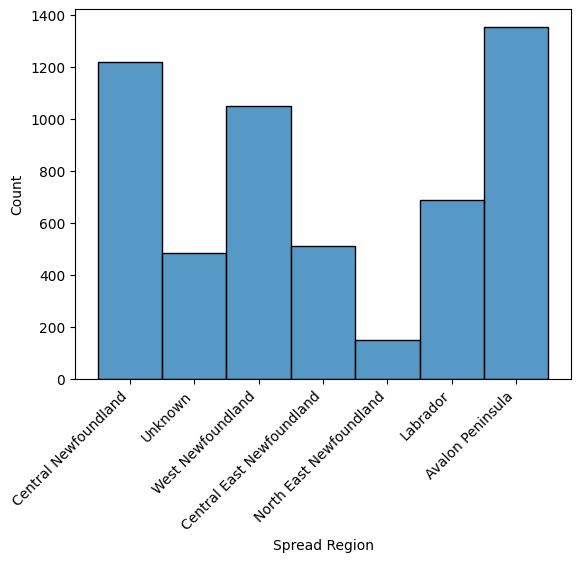

In [23]:
ax = sns.histplot(df_subset['Spread Region'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()

<Axes: ylabel='Frequency'>

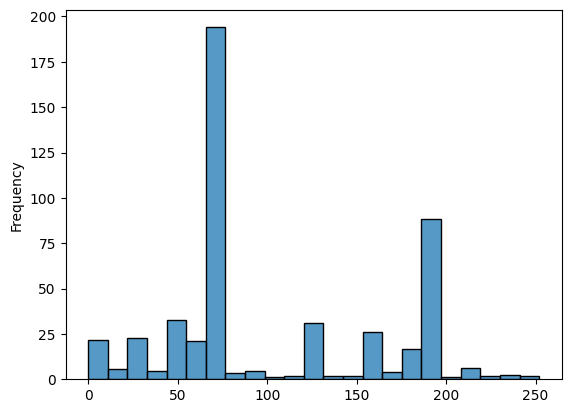

In [16]:
from sklearn.preprocessing import LabelEncoder

label_encoder_y = LabelEncoder()
y = label_encoder_y.fit_transform(df_subset['habitat'])
sns.histplot(y, stat='frequency')

Accuracy: 0.988805285373463
Avg. Precision: 0.9146167764687184
Avg. Recall: 0.9152491344272167
Cross-Validation Scores: [0.99816514 0.99174312 1.         1.         0.95224977]


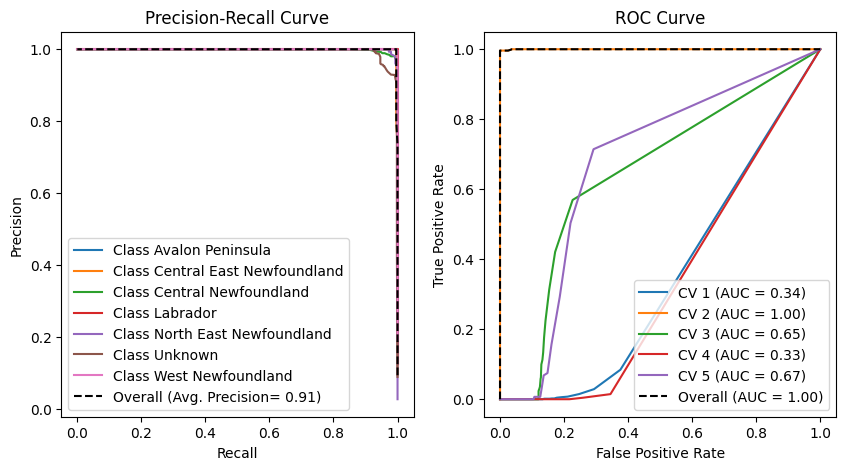

In [22]:
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, roc_curve, auc, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Preprocessing
# Assuming your DataFrame is named df

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to all categorical columns
df_encoded = df_subset.apply(label_encoder.fit_transform)

# Split the data into features (X) and target variable (y)
X = df_encoded.drop('Spread Region', axis=1)
y = df_encoded['Spread Region']

# If you have numerical features and need to scale them
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Random Forest Model
rf_classifier = RandomForestClassifier()

# Perform cross-validation predictions
y_pred_cv = cross_val_predict(rf_classifier, X_scaled, y, cv=5, method='predict_proba')

# Calculate accuracy
y_pred_cv_class = np.argmax(y_pred_cv, axis=1)  # Convert probabilities to class labels
accuracy = accuracy_score(y, y_pred_cv_class)

# Calculate cross-validation scores
cv_scores = cross_val_score(rf_classifier, X_scaled, y, cv=5)

# Precision-Recall Curve for each class
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
for i in range(len(label_encoder.classes_)):
    precision, recall, _ = precision_recall_curve(y == i, y_pred_cv[:, i])
    ax1.plot(recall, precision, label=f'Class {label_encoder.classes_[i]}')

# Overall Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y, y_pred_cv[:, 1], pos_label=1)
ax1.plot(recall, precision, label=f'Overall (Avg. Precision={np.mean(precision): .2f})', color='black', linestyle='--')

ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')
ax1.set_title('Precision-Recall Curve')
ax1.legend()

# ROC Curve for each cross-validation fold
for i in range(5):
    fpr, tpr, _ = roc_curve(y, y_pred_cv[:, 1], pos_label=i)
    roc_auc = auc(fpr, tpr)
    ax2.plot(fpr, tpr, label=f'CV {i+1} (AUC = {roc_auc:.2f})')

# Overall ROC Curve
fpr, tpr, _ = roc_curve(y, y_pred_cv[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
ax2.plot(fpr, tpr, label=f'Overall (AUC = {roc_auc:.2f})', color='black', linestyle='--')

ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve')
ax2.legend()

# Print accuracy, precision, recall, and cross-validation scores
print("Accuracy:", accuracy)
print("Avg. Precision:", np.mean(precision))
print("Avg. Recall:", np.mean(recall))
print("Cross-Validation Scores:", cv_scores)

plt.show()


## Acknowledgements

- Suptitle - https://stackoverflow.com/questions/55767312/how-to-position-suptitle
- Seaborn Scatterplot - https://seaborn.pydata.org/generated/seaborn.scatterplot.html
- Geopandas - https://geopandas.org/en/stable/docs/user_guide/mapping.html
- Canada Shape file - https://library.carleton.ca/find/gis/geospatial-data/shapefiles-canada-united-states-and-world
- WGS84 to EPSG - https://support.virtual-surveyor.com/support/solutions/articles/1000261351-what-is-wgs84-#:~:text=The%20WGS84%20Coordinate%20Systems%20adds,EPSG%20code%2C%20which%20is%204326.
- Climate Change NL - https://www.gov.nl.ca/ecc/files/publications-the-way-forward-climate-change.pdf
  